<a href="https://colab.research.google.com/github/qas95/Machine-Learning/blob/Deep-Learning/Classifying_Traffic_Signs_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs


fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [ ]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

import random
import pickle
import pandas as pd
import cv2
import requests
from PIL import Image

In [ ]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)

with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

with open('german-traffic-signs/valid.p', 'rb') as f:
  valid_data = pickle.load(f)

In [ ]:
X_train = train_data['features']
y_train = train_data['labels']

X_test = test_data['features']
y_test = test_data['labels']

X_val = valid_data['features']
y_val = valid_data['labels']


In [ ]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_val.shape[0] == y_val.shape[0])

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


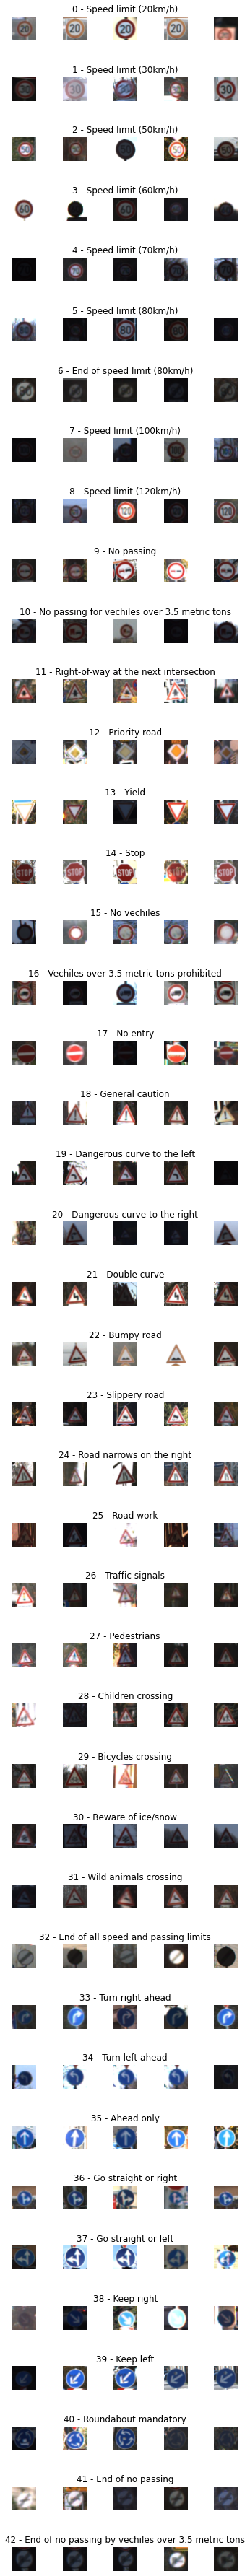

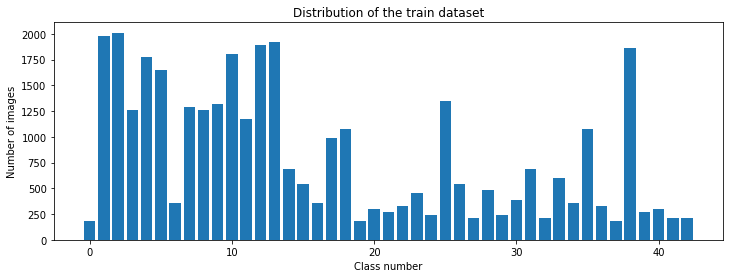

In [ ]:
  
num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

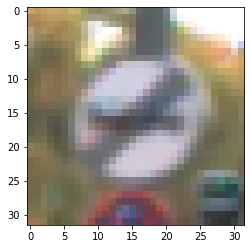

In [ ]:
plt.imshow(X_train[100])
plt.show()

In [ ]:
print(data.iloc[y_train[100]]['SignName'])

End of no passing


In [ ]:
def grayScale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, )
  return img

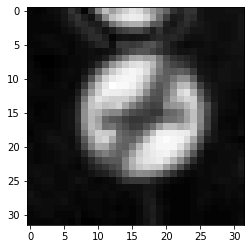

In [ ]:
plt.imshow(grayScale(X_train[1]), cmap = plt.get_cmap('gray'))

In [ ]:
def equalize_histogram(img):
  img = cv2.equalizeHist(img)
  return img

In [ ]:
def preprocessing(img):
  img = grayScale(img)
  img = equalize_histogram(img)
  img = img/255
  return img

In [ ]:
#Preprocessing all the images at once

X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))

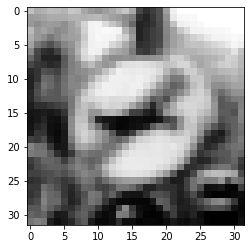

In [ ]:
plt.imshow(X_train[100], cmap = 'gray')

In [ ]:
X_train.shape
X_test.shape
X_val.shape

(4410, 32, 32)

In [ ]:
#Reshaping (adding depth) the data to feed into the neural net

X_train = X_train.reshape(34799, 32, 32,1)
X_test = X_test.reshape(12630, 32, 32,1)
X_val = X_val.reshape(4410, 32, 32,1)

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [ ]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

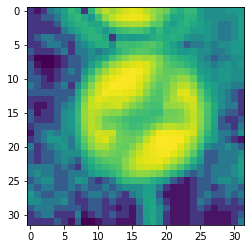

In [ ]:
plt.imshow(X_train[1].reshape(32,32))

In [ ]:
def leNet():
  model = Sequential()
  
  model.add(Conv2D(8, (5, 5), padding="same", activation='relu', input_shape=(32,32,1)))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(16, (3,3), activation='relu'))
  model.add(BatchNormalization(axis=-1))
  model.add(Conv2D(16, (3,3), activation='relu'))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(BatchNormalization(axis=-1))
  model.add(Conv2D(32, (3,3), activation='relu'))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPooling2D(2,2))
  
  model.add(Flatten())
  model.add(Dense(units = 200, activation = 'relu'))
  model.add(BatchNormalization(axis=-1))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(units = 200, activation = 'relu'))
  model.add(BatchNormalization(axis=-1))
  model.add(Dropout(0.5))
  
  model.add(Dense(43, activation = 'softmax'))
  model.compile(optimizer = Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model = leNet()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 8)         208       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 16)        64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 16)        2320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 16)       

In [ ]:
X_train.shape

(34799, 32, 32, 1)

In [ ]:
#hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size = 4, shuffle=True, verbose = 1)

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', "validation"])
plt.title('Accuracies')
plt.xlabel('epochs')
plt.show()

NameError: ignored

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', "validation"])
plt.title('Loss')
plt.xlabel('epochs')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print('Loss ',score[0])
print('Accuracy ',score[1])

395/395 [==============================] - 4s 3ms/step - loss: 3.7616 - accuracy: 0.0518
Loss  3.761570692062378
Accuracy  0.053998418152332306


In [ ]:
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
response = requests.get(url, stream = True)
img2 = Image.open(response.raw)

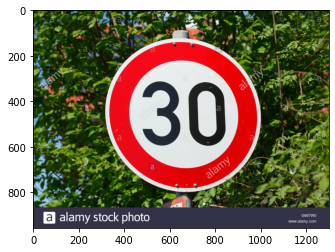

In [ ]:
plt.imshow(img2)

In [ ]:
img2 = np.asarray(img2)
img2 = cv2.resize(img2, (32,32))
img2.shape

(32, 32, 3)

(32, 32)

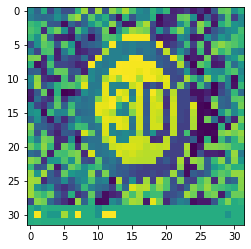

In [ ]:
img2 = grayScale(img2)
img2 = equalize_histogram(img2)
plt.imshow(img2)
img2.shape

In [ ]:
np.argmax(model.predict(img2.reshape(1,32,32,1)), axis = -1)
#Incorrect Classification

array([38])

In [ ]:
data.iloc[38]

ClassId             22
SignName    Bumpy road
Name: 22, dtype: object

In [ ]:
#Since there is not enough samples for each of the 43 classes, lets use data augmentation and create more training data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,shear_range=0.1, zoom_range=0.2, rotation_range=10)
datagen.fit(X_train)

In [ ]:
batches = datagen.flow(X_train, y_train, batch_size=20)
x, y = next(batches)

<Figure size 720x576 with 0 Axes>

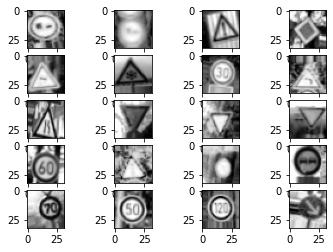

In [ ]:
#Displaying a random batch of 20 newly generated images

plt.figure(figsize = (10,8))
fig, axis = plt.subplots(5,4)
l = len(x)
a=0
for i in range(4):
  for j in range(5):
    if(a < l):
      axis[j][i].imshow(x[a].reshape(32,32), cmap = 'gray')
      a+=1

In [ ]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=5), steps_per_epoch=len(X_train)/5, epochs = 10, verbose = 1, validation_data=(X_val, y_val))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
6959/6959 [==============================] - 41s 6ms/step - loss: 4.6193 - accuracy: 0.0463 - val_loss: 2.7811 - val_accuracy: 0.2585
Epoch 2/10
6959/6959 [==============================] - 40s 6ms/step - loss: 3.4293 - accuracy: 0.1464 - val_loss: 2.1387 - val_accuracy: 0.3667
Epoch 3/10
6959/6959 [==============================] - 41s 6ms/step - loss: 2.7637 - accuracy: 0.2443 - val_loss: 1.7158 - val_accuracy: 0.4719
Epoch 4/10
6959/6959 [==============================] - 40s 6ms/step - loss: 2.3341 - accuracy: 0.3353 - val_loss: 1.3990 - val_accuracy: 0.5585
Epoch 5/10
6959/6959 [==============================] - 40s 6ms/step - loss: 2.0234 - accuracy: 0.3991 - val_loss: 1.1808 - val_accuracy: 0.6136
Epoch 6/10
6959/6959 [==============================] - 40s 6ms/step - loss: 1.7590 - accuracy: 0.4736 - val_loss: 0.8953 - val_accuracy: 0.7200
Epoch 7/10
6959/6959 [==============================] - 40s 6ms/step - loss: 1.5494 - accuracy: 0.5338 - val_loss: 0.7225 - val_ac

In [ ]:
#Lets try the same image again after training the model with augmented data
plt.imshow(img2)

In [ ]:
np.argmax(model.predict(img2.reshape(1,32,32,1)), axis = -1)


In [ ]:
data.iloc[22]

In [ ]:
plt.imshow(img2.reshape(32,32))